In [1]:
# linear,polynomial and RBF models for closing price

In [2]:
import import_ipynb
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
tr = pd.read_csv (r'E:\ML\archive\Tesla.csv - Tesla.csv.csv',nrows=100)
tr

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
95,11/11/2010,28.600000,29.100000,27.330000,28.040001,1945300,28.040001
96,11/12/2010,28.250000,30.500000,28.070000,29.840000,2729100,29.840000
97,11/15/2010,30.219999,32.939999,30.219999,30.799999,2622900,30.799999
98,11/16/2010,31.000000,31.400000,28.420000,29.670000,1347600,29.670000


In [4]:
val = pd.read_csv (r'E:\ML\archive\Tesla.csv - Tesla.csv.csv',skiprows=100,nrows=100)
val

,11/17/2010,30.200001,30.75,28.610001,29.49,750000,29.49.1
0,11/18/2010,30.670000,30.740000,28.920000,29.889999,956100,29.889999
1,11/19/2010,30.160000,31.370001,29.700001,30.990000,1150500,30.990000
2,11/22/2010,31.570000,33.450001,31.500000,33.400002,1529700,33.400002
3,11/23/2010,33.290001,35.680000,32.189999,34.570000,1577800,34.570000
4,11/24/2010,35.270000,35.970001,34.330002,35.470001,1425000,35.470001
...,...,...,...,...,...,...,...
95,4/6/2011,26.990000,27.010000,25.799999,26.490000,1288300,26.490000
96,4/7/2011,26.850000,27.940001,26.450001,27.240000,2810300,27.240000
97,4/8/2011,27.580000,27.600000,26.360001,26.490000,1946400,26.490000
98,4/11/2011,26.469999,26.530001,25.020000,25.270000,1369400,25.270000


In [5]:
ts = pd.read_csv (r'E:\ML\archive\Tesla.csv - Tesla.csv.csv',skiprows=200,nrows=100)
ts

,4/12/2011,25.08,25.209999,24.299999,24.65,1357400,24.65.1
0,4/13/2011,25.129999,25.690001,24.809999,24.930000,1211500,24.930000
1,4/14/2011,24.870001,25.280001,24.200001,25.139999,983400,25.139999
2,4/15/2011,25.650000,26.180000,25.410000,25.580000,943500,25.580000
3,4/18/2011,25.129999,25.620001,24.360001,25.030001,1033900,25.030001
4,4/19/2011,25.260000,25.260000,24.650000,25.160000,548700,25.160000
...,...,...,...,...,...,...,...
95,8/29/2011,24.219999,24.850000,24.020000,24.709999,803400,24.709999
96,8/30/2011,24.500000,24.770000,24.090000,24.629999,366200,24.629999
97,8/31/2011,24.799999,25.500000,24.280001,24.740000,823800,24.740000
98,9/1/2011,24.660000,24.870001,23.840000,24.000000,848100,24.000000


In [6]:
days=list()
close_p=list()

In [7]:
tr_days=tr.loc[:,'Date'] 
tr_close_p=tr.loc[:,'Adj Close']

In [8]:
for i in tr_close_p:
    close_p.append(float(i))

In [9]:
for i in range(1,len(close_p)+1):
    days.append([i])

In [10]:
len(close_p)

100

In [11]:
#Training 
lin_svr=SVR(kernel='linear',C=1000.0)
lin_svr.fit(days,close_p) 
#linear svr

poly_svr= SVR(kernel='poly', C=1000.0, degree=2)
poly_svr.fit(days,close_p) 
#polynomial svr

rbf_svr=SVR(kernel='rbf', C=1000.0, gamma=0.85)
rbf_svr.fit(days,close_p) 
#RBF svr

SVR(C=1000.0, gamma=0.85)

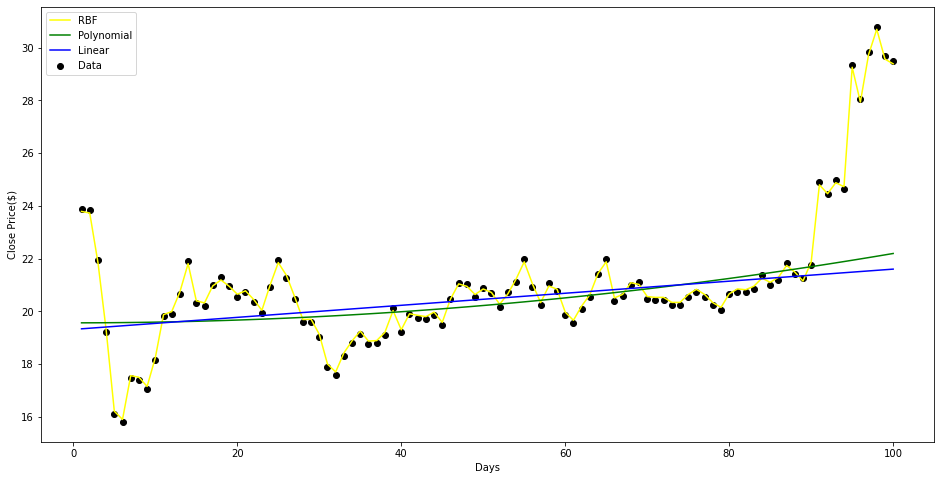

In [12]:
#Plots
plt.figure(figsize=(16,8))
plt.scatter(days,close_p,color="black",label="Data")
plt.plot(days,rbf_svr.predict(days),color="yellow",label="RBF")
plt.plot(days,poly_svr.predict(days),color="green",label="Polynomial")
plt.plot(days,lin_svr.predict(days),color="blue",label="Linear")
plt.xlabel('Days')
plt.ylabel('Close Price($)')
plt.legend()
plt.show()

In [13]:
value=val.loc[:,str(close_p[-1])]
value

0     29.889999
1     30.990000
2     33.400002
3     34.570000
4     35.470001
        ...    
95    26.490000
96    27.240000
97    26.490000
98    25.270000
99    24.650000
Name: 29.49, Length: 100, dtype: float64

In [14]:
a=rbf_svr.predict([[100]])
b=lin_svr.predict([[100]])
c=poly_svr.predict([[100]])
print(a,b,c,value[0])

[29.39027238] [21.6016665] [22.19491832] 29.889999


In [20]:
#k-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import max_error, make_scorer
maxb=make_scorer(max_error, greater_is_better=False)
score_L=cross_val_score(lin_svr,days,close_p,cv=5,scoring=maxb)
score_L.mean()

-4.211098430887725

In [21]:
score_P=cross_val_score(poly_svr,days,close_p,cv=5,scoring=maxb)
score_P.mean()

-4.320704549425951

In [22]:
score_R=cross_val_score(rbf_svr,days,close_p,cv=5,scoring=maxboyy)
score_R.mean()

-4.573717881918055